In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from itertools import cycle
import seaborn as sns

In [3]:
happy_filepath = 'C:/Users/16148/Desktop/Bootcamp/Group Project 1/Resources/WHR2023.csv'
prosp_filepath = 'C:/Users/16148/Desktop/Bootcamp/Group Project 1/Resources/2023_world_prosperity.csv'
c_o_l_filepath = 'C:/Users/16148/Desktop/Bootcamp/Group Project 1/Resources/cost_of_living_indices3.csv'
info_filepath = 'C:/Users/16148/Desktop/Bootcamp/Group Project 1/Resources/world-data-2023.csv'
hosp_rank_filepath = 'C:/Users/16148/Desktop/Bootcamp/Group Project 1/Resources/Hospital_Ranking_Data_2023.csv'




happiness = pd.read_csv(happy_filepath)
prosperity = pd.read_csv(prosp_filepath)
cost_of_living = pd.read_csv(c_o_l_filepath)
info = pd.read_csv(info_filepath)
hosp_rank_df = pd.read_csv(hosp_rank_filepath)

In [4]:
import os
os.chdir('C:/Users/16148/Desktop/Bootcamp/Group Project 1/Plots')

In [5]:
display(happiness.info())
happiness.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

None

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110
5,Sweden,7.395,0.037,7.468,7.322,10.883,0.939,72.150,0.948,0.165,0.202,1.778,1.921,1.510,0.562,0.754,0.225,0.520,1.903
6,Norway,7.315,0.044,7.402,7.229,11.088,0.943,71.500,0.947,0.141,0.283,1.778,1.994,1.521,0.544,0.752,0.212,0.463,1.829
7,Switzerland,7.240,0.043,7.324,7.156,11.164,0.920,72.900,0.891,0.027,0.266,1.778,2.022,1.463,0.582,0.678,0.151,0.475,1.870
8,Luxembourg,7.228,0.069,7.363,7.093,11.660,0.879,71.675,0.915,0.024,0.345,1.778,2.200,1.357,0.549,0.710,0.149,0.418,1.845
9,New Zealand,7.123,0.038,7.198,7.048,10.662,0.952,70.350,0.887,0.175,0.271,1.778,1.842,1.544,0.513,0.672,0.230,0.471,1.852


In [6]:
# Cleaning Happiness Dataframe

# List of columns to drop
columns_to_drop = ['Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Ladder score in Dystopia']

# Drop the specified columns from the DataFrame
happy_cleaned = happiness.drop(columns=columns_to_drop)

# Rename columns for clarity
happy_cleaned.columns = ['Country', 'Ladder Score', 'Logged GDP per capita',
                         'Social Support', 'Healthy Life Expectancy', 'Freedom to make life choices',
                         'Generosity', 'Perceptions of Corruption',
                         'EB: Log GDP per capita', 'Explained by: Social support',
                         'EB: Healthy life expectancy',
                         'EB: Freedom to make life choices',
                         'EB: Generosity', 'EB: Perceptions of corruption',
                         'Dystopia/Residual']

# Display the cleaned DataFrame
happy_cleaned.head(10)

,Country,Ladder Score,Logged GDP per capita,Social Support,Healthy Life Expectancy,Freedom to make life choices,Generosity,Perceptions of Corruption,EB: Log GDP per capita,Explained by: Social support,EB: Healthy life expectancy,EB: Freedom to make life choices,EB: Generosity,EB: Perceptions of corruption,Dystopia/Residual
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,1.942,1.488,0.545,0.672,0.251,0.394,2.110
5,Sweden,7.395,10.883,0.939,72.150,0.948,0.165,0.202,1.921,1.510,0.562,0.754,0.225,0.520,1.903
6,Norway,7.315,11.088,0.943,71.500,0.947,0.141,0.283,1.994,1.521,0.544,0.752,0.212,0.463,1.829
7,Switzerland,7.240,11.164,0.920,72.900,0.891,0.027,0.266,2.022,1.463,0.582,0.678,0.151,0.475,1.870
8,Luxembourg,7.228,11.660,0.879,71.675,0.915,0.024,0.345,2.200,1.357,0.549,0.710,0.149,0.418,1.845
9,New Zealand,7.123,10.662,0.952,70.350,0.887,0.175,0.271,1.842,1.544,0.513,0.672,0.230,0.471,1.852


In [7]:
happy_cleaned.columns

Index(['Country', 'Ladder Score', 'Logged GDP per capita', 'Social Support',
       'Healthy Life Expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of Corruption', 'EB: Log GDP per capita',
       'Explained by: Social support', 'EB: Healthy life expectancy',
       'EB: Freedom to make life choices', 'EB: Generosity',
       'EB: Perceptions of corruption', 'Dystopia/Residual'],
      dtype='object')

In [8]:
# Top 10 Countries by Happiness
top10_countries = ['Finland', 'Denmark', 'Iceland', 'Israel', 'Netherlands',
                 'Sweden', 'Norway', 'Switzerland', 'Luxembourg',
                 'New Zealand']

In [9]:
bottom10_countries = happy_cleaned.nsmallest(10, 'Ladder Score')['Country'].tolist()
bottom10_countries

['Afghanistan',
 'Lebanon',
 'Sierra Leone',
 'Zimbabwe',
 'Congo (Kinshasa)',
 'Botswana',
 'Malawi',
 'Comoros',
 'Tanzania',
 'Zambia']

In [10]:
# Scaling the data

from sklearn.preprocessing import MinMaxScaler

columns = ['Logged GDP per capita', 'Social Support', 'Healthy Life Expectancy',
           'Freedom to make life choices', 'Generosity', 'Perceptions of Corruption',
           'Ladder Score']

# Scale the columns to a range of 1 to 10 for all countries
scaler = MinMaxScaler(feature_range=(1, 10))
happy_scaled = happy_cleaned.copy()
happy_scaled[columns] = scaler.fit_transform(happy_cleaned[columns])

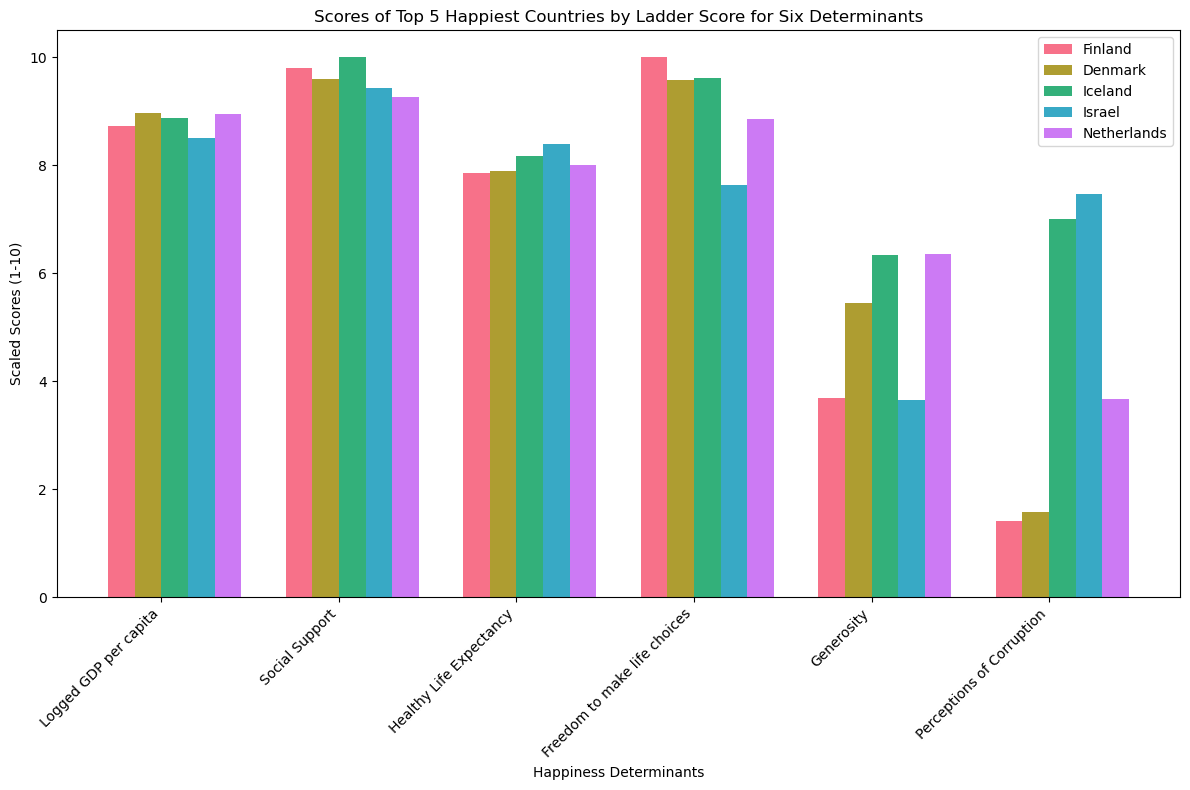

In [11]:
# Visualizing the Top5 Happiest Countries in the 6 Determinant

import seaborn as sns
import matplotlib.cm as cm
from itertools import cycle

top_countries = ['Finland', 'Denmark', 'Iceland', 'Israel', 'Netherlands']
columns_to_plot = ['Logged GDP per capita', 'Social Support', 'Healthy Life Expectancy',
                   'Freedom to make life choices', 'Generosity', 'Perceptions of Corruption']


# Filter the dataframe for the top countries
top_df_scaled = happy_scaled[happy_scaled['Country'].isin(top_countries)]

# Plotting
plt.figure(figsize=(12, 8))
bar_width = 0.15
x = range(len(columns_to_plot))

# Set a color palette
colors = sns.color_palette("husl", len(top_countries))

# Create bars for each country
for i, (country, color) in enumerate(zip(top_countries, colors)):
    plt.bar([p + bar_width * i for p in x],
            top_df_scaled[top_df_scaled['Country'] == country][columns_to_plot].values.flatten(),
            width=bar_width, label=country, color=color)

# Add ticks and labels
plt.xlabel('Happiness Determinants')
plt.ylabel('Scaled Scores (1-10)')
plt.title('Scores of Top 5 Happiest Countries by Ladder Score for Six Determinants')
plt.xticks([p + 1.5 * bar_width for p in x], columns_to_plot, rotation=45, ha='right')
plt.legend(top_countries)
plt.tight_layout()
plt.savefig('top5happy.png', dpi=300, bbox_inches='tight')
# Show plot
plt.show()

In [12]:
display(prosperity.info())
prosperity.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     167 non-null    object 
 1   AveragScore                 167 non-null    float64
 2   SafetySecurity              167 non-null    float64
 3   PersonelFreedom             167 non-null    float64
 4   Governance                  167 non-null    float64
 5   SocialCapital               167 non-null    float64
 6   InvestmentEnvironment       167 non-null    float64
 7   EnterpriseConditions        167 non-null    float64
 8   MarketAccessInfrastructure  167 non-null    float64
 9   EconomicQuality             167 non-null    float64
 10  LivingConditions            167 non-null    float64
 11  Health                      167 non-null    float64
 12  Education                   167 non-null    float64
 13  NaturalEnvironment          167 non

None

,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
0,Denmark,84.55,92.59,94.09,89.45,82.56,82.42,79.64,78.79,76.81,95.77,81.07,87.48,73.94
1,Sweden,83.67,90.97,91.90,86.41,78.29,82.81,75.54,79.67,76.18,95.33,82.28,85.92,78.74
2,Norway,83.59,93.30,94.10,89.66,79.03,82.24,75.95,75.87,77.25,94.70,82.98,85.68,72.37
3,Finland,83.47,89.56,91.96,90.41,77.27,84.12,77.25,78.77,70.28,94.46,81.19,88.38,77.99
4,Switzerland,83.42,95.66,87.50,87.67,69.14,80.81,83.84,78.65,79.71,94.66,82.11,87.72,73.60
5,Netherlands,82.32,91.19,90.08,87.34,74.03,84.11,79.09,80.82,74.34,95.86,82.05,86.43,62.49
6,Luxembourg,81.83,96.32,89.20,86.31,66.60,78.91,80.72,80.03,76.93,94.56,81.59,78.79,71.98
7,Iceland,81.02,91.64,88.74,83.30,77.75,79.20,72.86,76.07,69.92,93.82,82.72,85.19,71.01
8,Germany,80.81,87.92,87.70,84.39,65.96,78.87,79.70,80.23,73.96,94.42,81.41,83.45,71.69
9,New Zealand,80.47,85.07,87.56,87.19,79.88,82.58,72.82,74.60,69.88,90.66,79.84,83.89,71.71


In [13]:
prosperity.columns = ['Country', 'Avg Score', 'Safety/Security', 'Personal Freedom',
       'Governance', 'Social Capital', 'Investment Environment',
       'Enterprise Conditions', 'Market Access Infrastructure',
       'Economic Quality', 'Living Conditions', 'Health', 'Education',
       'Natural Environment']

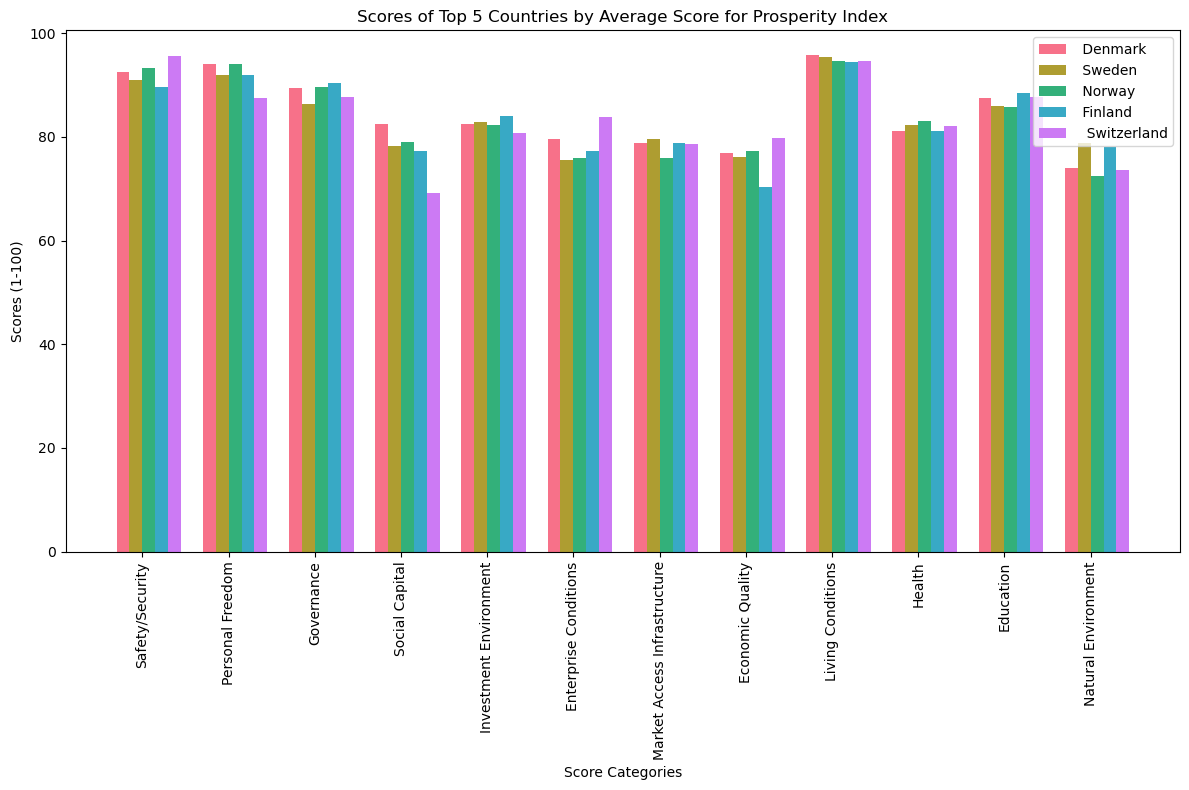

In [14]:
# Get the list of top 5 countries
top_5_prosp = prosperity.sort_values('Avg Score', ascending=False).head(5)
top_countries_prosp = top_5_prosp['Country'].tolist()

prosp_columns_to_plot = ['Safety/Security', 'Personal Freedom',
       'Governance', 'Social Capital', 'Investment Environment',
       'Enterprise Conditions', 'Market Access Infrastructure', 'Economic Quality',
       'Living Conditions', 'Health', 'Education', 'Natural Environment']

# Plotting
plt.figure(figsize=(12, 8))
bar_width = 0.15
x = range(len(prosp_columns_to_plot))

# Set a color palette
colors = sns.color_palette("husl", len(top_countries_prosp))

# Create bars for each country
for i, (country, color) in enumerate(zip(top_countries_prosp, colors)):
    plt.bar([p + bar_width * i for p in x],
            top_5_prosp[top_5_prosp['Country'] == country][prosp_columns_to_plot].values.flatten(),
            width=bar_width, label=country, color=color)

# Add ticks and labels
plt.xlabel('Score Categories')
plt.ylabel('Scores (1-100)')
plt.title('Scores of Top 5 Countries by Average Score for Prosperity Index')
plt.xticks([p + 1.5 * bar_width for p in x], prosp_columns_to_plot, rotation=90, ha='center')
plt.legend(top_countries_prosp)
plt.tight_layout()
plt.savefig('top5 prosp.png', dpi=300, bbox_inches='tight')
# Show plot
plt.show()

In [15]:
display(info.info())
info.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

None

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
5,Antigua and Barbuda,223,AG,20.50%,443,0,15.33,1.0,"St. John's, Saint John",557,...,24.30%,2.76,"97,118",NaN,16.50%,43.00%,NaN,"23,800",17.060816,-61.796428
6,Argentina,17,AR,54.30%,"2,780,400","105,000",17.02,54.0,Buenos Aires,"201,348",...,17.60%,3.96,"44,938,712",61.30%,10.10%,106.30%,9.79%,"41,339,571",-38.416097,-63.616672
7,Armenia,104,AM,58.90%,"29,743","49,000",13.99,374.0,Yerevan,"5,156",...,81.60%,4.40,"2,957,731",55.60%,20.90%,22.60%,16.99%,"1,869,848",40.069099,45.038189
8,Australia,3,AU,48.20%,"7,741,220","58,000",12.60,61.0,Canberra,"375,908",...,19.60%,3.68,"25,766,605",65.50%,23.00%,47.40%,5.27%,"21,844,756",-25.274398,133.775136
9,Austria,109,AT,32.40%,"83,871","21,000",9.70,43.0,Vienna,"61,448",...,17.90%,5.17,"8,877,067",60.70%,25.40%,51.40%,4.67%,"5,194,416",47.516231,14.550072


In [16]:
info.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [17]:
# World Data Dataframe columns to drop

info_cleaned = info.drop(columns=['Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Largest city',
       'Minimum wage', 'Official language',
       'Tax revenue (%)', 'Total tax rate',
       'Latitude', 'Longitude'])



# Clean population column
info_cleaned['Population'] = info['Population'].str.replace('\xa0', ' ')  # Replace non-breaking spaces with regular spaces
info_cleaned['Population'] = info_cleaned['Population'].str.replace(' ', '')  # Remove any spaces
info_cleaned['Population'] = pd.to_numeric(info_cleaned['Population'].str.replace(',', ''), errors='coerce')  # Remove commas and convert to numeric

# Cleaning Columns and Converting to floats for Analysis
def clean_and_convert(series):
     return pd.to_numeric(series.str.replace('%', '').str.strip(), errors='coerce').astype(float)

columns_to_clean = [
    'Gross primary education enrollment (%)',
    'Gross tertiary education enrollment (%)',
    'Population: Labor force participation (%)',
    'Out of pocket health expenditure'
    ]

for col in columns_to_clean:
    info_cleaned[col] = clean_and_convert(info_cleaned[col])

# Replace NaN with zero
info_cleaned.fillna(0, inplace=True)

# Check data types
print(info_cleaned.dtypes)

# Check for any remaining NaN values
print(info_cleaned.isna().sum())

Country                                       object
Birth Rate                                   float64
Fertility Rate                               float64
Gross primary education enrollment (%)       float64
Gross tertiary education enrollment (%)      float64
Infant mortality                             float64
Life expectancy                              float64
Maternal mortality ratio                     float64
Out of pocket health expenditure             float64
Physicians per thousand                      float64
Population                                   float64
Population: Labor force participation (%)    float64
Unemployment rate                             object
Urban_population                              object
dtype: object
Country                                      0
Birth Rate                                   0
Fertility Rate                               0
Gross primary education enrollment (%)       0
Gross tertiary education enrollment (%)      0
Infant mo

In [18]:
info_cleaned.head()

,Country,Birth Rate,Fertility Rate,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Unemployment rate,Urban_population
0,Afghanistan,32.49,4.47,104.0,9.7,47.9,64.5,638.0,78.4,0.28,38041754.0,48.9,11.12%,"9,797,273"
1,Albania,11.78,1.62,107.0,55.0,7.8,78.5,15.0,56.9,1.20,2854191.0,55.7,12.33%,"1,747,593"
2,Algeria,24.28,3.02,109.9,51.4,20.1,76.7,112.0,28.1,1.72,43053054.0,41.2,11.70%,"31,510,100"
3,Andorra,7.20,1.27,106.4,0.0,2.7,0.0,0.0,36.4,3.33,77142.0,0.0,0,"67,873"
4,Angola,40.73,5.52,113.5,9.3,51.6,60.8,241.0,33.4,0.21,31825295.0,77.5,6.89%,"21,061,025"


In [19]:
# Your list of top 10 countries
top10_countries = ['Finland', 'Denmark', 'Iceland', 'Israel', 'Netherlands',
                   'Sweden', 'Norway', 'Switzerland', 'Luxembourg',
                   'New Zealand']

# Create a new dataframe to store the values for the top 10 countries
top10_info = info_cleaned[info_cleaned['Country'].isin(top10_countries)].set_index('Country')

# Sort the dataframe by country name
top10_info = top10_info.loc[top10_countries]

# Display the dataframe
display(top10_info)

,Birth Rate,Fertility Rate,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Unemployment rate,Urban_population
Country,,,,,,,,,,,,,
Finland,8.60,1.41,100.2,88.2,1.4,81.7,3.0,19.9,3.81,5520314.0,59.1,6.59%,"4,716,888"
Denmark,10.60,1.73,101.3,80.6,3.6,81.0,4.0,13.7,4.01,5818553.0,62.2,4.91%,"5,119,978"
Iceland,12.00,1.71,100.4,71.8,1.5,82.7,4.0,17.0,4.08,361313.0,75.0,2.84%,"339,110"
Israel,20.80,3.09,104.9,63.4,3.0,82.8,3.0,24.4,4.62,9053300.0,64.0,3.86%,"8,374,393"
Netherlands,9.70,1.59,104.2,85.0,3.3,81.8,5.0,12.3,3.61,17332850.0,63.6,3.20%,"15,924,729"
Sweden,11.40,1.76,126.6,67.0,2.2,82.5,4.0,15.2,3.98,10285453.0,64.6,6.48%,"9,021,165"
Norway,10.40,1.56,100.3,82.0,2.1,82.8,2.0,14.3,2.92,5347896.0,63.8,3.35%,"4,418,218"
Switzerland,10.00,1.52,105.2,59.6,3.7,83.6,5.0,28.3,4.30,8574832.0,68.3,4.58%,"6,332,428"
Luxembourg,10.30,1.37,102.3,19.2,1.9,82.1,5.0,10.6,3.01,645397.0,59.3,5.36%,"565,488"


In [20]:
# Your list of top 10 countries
top10_countries = ['Finland', 'Denmark', 'Iceland', 'Israel', 'Netherlands',
                   'Sweden', 'Norway', 'Switzerland', 'Luxembourg',
                   'New Zealand']

# Columns where higher is better
higher_better = ['Birth Rate', 'Fertility Rate',
                 'Gross primary education enrollment (%)',
                 'Gross tertiary education enrollment (%)',
                 'Life expectancy', 'Physicians per thousand',
                 'Population']

# Columns where lower is better
lower_better = ['Infant mortality', 'Maternal mortality ratio',
                'Out of pocket health expenditure']

def rank_column(series, ascending=True, ignore_zeros=False):
    if ignore_zeros:
        series = series.replace(0, np.nan)
    return series.rank(method='min', ascending=ascending, na_option='bottom')

# Combine all columns we're interested in
columns_of_interest = higher_better + lower_better

# Create an empty dataframe to store the rankings
top10_rankings = pd.DataFrame(index=top10_countries, columns=columns_of_interest)

for column in columns_of_interest:
    if column in higher_better:
        rankings = rank_column(info_cleaned[column], ascending=False)
    else:  # column in lower_better
        rankings = rank_column(info_cleaned[column], ascending=True, ignore_zeros=True)

    # Create a Series with country as index and rankings as values
    rankings_series = pd.Series(rankings.values, index=info_cleaned['Country'])

    # Filter rankings for top10 countries and convert to int
    top10_rankings[column] = rankings_series[top10_countries].astype(int)

# Sort the dataframe by index to match the order of top10_countries
top10_rankings = top10_rankings.reindex(top10_countries)

# Display the rankings
display(top10_rankings)

,Birth Rate,Fertility Rate,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Life expectancy,Physicians per thousand,Population,Infant mortality,Maternal mortality ratio,Out of pocket health expenditure
Finland,179,172,123,8,21,27,115,1,5,59
Denmark,148,134,104,20,27,21,113,31,10,33
Iceland,133,139,117,27,10,19,171,2,10,47
Israel,75,58,70,45,8,11,96,22,5,76
Netherlands,166,153,75,14,20,30,66,27,14,28
Sweden,141,127,6,38,13,23,87,10,10,40
Norway,151,156,120,17,8,48,118,8,1,34
Switzerland,161,161,67,53,3,15,99,35,14,89
Luxembourg,154,176,97,114,17,44,162,6,14,21
New Zealand,136,139,127,17,18,31,123,41,35,31


In [21]:
top10_rankings.sort_values(by='Out of pocket health expenditure', ascending=True, inplace=True)
top10_rankings

,Birth Rate,Fertility Rate,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Life expectancy,Physicians per thousand,Population,Infant mortality,Maternal mortality ratio,Out of pocket health expenditure
Luxembourg,154,176,97,114,17,44,162,6,14,21
Netherlands,166,153,75,14,20,30,66,27,14,28
New Zealand,136,139,127,17,18,31,123,41,35,31
Denmark,148,134,104,20,27,21,113,31,10,33
Norway,151,156,120,17,8,48,118,8,1,34
Sweden,141,127,6,38,13,23,87,10,10,40
Iceland,133,139,117,27,10,19,171,2,10,47
Finland,179,172,123,8,21,27,115,1,5,59
Israel,75,58,70,45,8,11,96,22,5,76
Switzerland,161,161,67,53,3,15,99,35,14,89


In [22]:
# Creating a ranking dataframe from the info_cleaned dataframe
# This contains the rank for each country for certain columns

def rank_column(series, ascending=True, ignore_zeros=False):
    if ignore_zeros:
        series = series.replace(0, np.nan)
    return series.rank(method='min', ascending=ascending, na_option='bottom')

# Combine all columns we're interested in
columns_of_interest = higher_better + lower_better

# Create an empty dataframe to store the rankings
info_ranked = pd.DataFrame(index=info_cleaned.index, columns=columns_of_interest)

for column in columns_of_interest:
    if column in higher_better:
        rankings = rank_column(info_cleaned[column], ascending=False)
    else:  # column in lower_better
        rankings = rank_column(info_cleaned[column], ascending=True, ignore_zeros=True)

    # Assign rankings to info_ranked
    info_ranked[column] = rankings.astype(int)

# Add the 'Country' column to info_ranked
info_ranked['Country'] = info_cleaned['Country']

# Set 'Country' as the index
info_ranked.set_index('Country', inplace=True)

display(info_ranked.head())


,Birth Rate,Fertility Rate,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Life expectancy,Physicians per thousand,Population,Infant mortality,Maternal mortality ratio,Out of pocket health expenditure
Country,,,,,,,,,,
Afghanistan,31,25,77,148,153,144,37,164,172,185
Albania,137,147,52,57,39,102,136,64,48,166
Algeria,61,60,36,62,59,86,34,114,115,88
Andorra,186,181,57,184,188,35,184,17,182,111
Angola,6,6,23,149,172,150,45,172,139,101


In [23]:
info_ranked.sort_values(by='Physicians per thousand', ascending=True, inplace=True)
info_ranked.head(10)

,Birth Rate,Fertility Rate,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Life expectancy,Physicians per thousand,Population,Infant mortality,Maternal mortality ratio,Out of pocket health expenditure
Country,,,,,,,,,,
Cuba,158,147,99,74,37,1,81,35,75,189
Georgia,127,107,145,43,92,2,129,67,61,168
Monaco,189,189,189,184,188,3,188,14,182,9
Lithuania,161,146,81,26,69,4,138,27,30,97
San Marino,187,183,47,73,1,5,190,3,182,52
Greece,182,177,135,1,24,6,85,31,5,104
Belarus,164,168,116,11,87,7,94,14,1,103
Austria,166,165,90,13,22,8,97,20,14,51
Portugal,180,175,61,43,24,9,88,23,30,85


In [24]:
country_phys_list = info_ranked['Physicians per thousand'].tolist()
country_phys_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 21,
 23,
 23,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 50,
 52,
 53,
 53,
 55,
 55,
 55,
 58,
 59,
 60,
 60,
 62,
 63,
 64,
 65,
 66,
 66,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 91,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 108,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 124,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 133,
 133,
 136,
 137,
 138,
 138,
 140,
 141,
 142,
 142,
 144,
 145,
 146,
 147,
 147,
 149,
 150,
 150,
 152,
 153,
 153,
 155,
 155,
 157,
 157,
 157,
 160,
 161,
 162,
 162,
 162,
 165,
 166,
 166,
 168,
 169,
 169,
 169,
 169,
 169,
 169,
 175,
 175,
 175,
 175,
 179,
 179,
 181,
 182,
 182,
 182,
 182

In [25]:
display(cost_of_living.info())
cost_of_living.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         121 non-null    object 
 1   Cost of Living Index            121 non-null    float64
 2   Rent Index                      121 non-null    float64
 3   Cost of Living Plus Rent Index  121 non-null    float64
 4   Groceries Index                 121 non-null    float64
 5   Restaurant Price Index          121 non-null    float64
 6   Local Purchasing Power Index    121 non-null    float64
dtypes: float64(6), object(1)
memory usage: 6.7+ KB


None

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,Barbados,76.6,19.0,48.9,80.8,69.4,43.5
5,Norway,76.0,26.2,52.1,79.0,73.5,114.7
6,Denmark,72.3,26.4,50.2,64.8,81.3,127.2
7,Hong Kong (China),70.8,59.4,65.3,84.6,46.2,109.3
8,United States,70.4,41.7,56.6,75.0,67.2,142.3
9,Australia,70.2,33.4,52.5,77.3,62.5,127.4


In [26]:
# Rank the Cost of Living Index and append to top10_rankings df
# Cost of living is already the ordered index so ranking function is not needed.

# Create a dictionary to store the rankings
col_rankings = {}

# Find the rank for each country in top10_countries
for country in top10_countries:
    try:
        # Find the index of the country and add 1 to get the rank
        rank = cost_of_living[cost_of_living['Country'] == country].index[0] + 1
        col_rankings[country] = rank
    except IndexError:
        # If the country is not found, assign NaN
        col_rankings[country] = pd.np.nan

# Add the new column to top10_rankings
top10_rankings['Cost of Living Index'] = top10_rankings.index.map(col_rankings)

# Display the updated dataframe
display(top10_rankings)

,Birth Rate,Fertility Rate,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Life expectancy,Physicians per thousand,Population,Infant mortality,Maternal mortality ratio,Out of pocket health expenditure,Cost of Living Index
Luxembourg,154,176,97,114,17,44,162,6,14,21,20
Netherlands,166,153,75,14,20,30,66,27,14,28,18
New Zealand,136,139,127,17,18,31,123,41,35,31,13
Denmark,148,134,104,20,27,21,113,31,10,33,7
Norway,151,156,120,17,8,48,118,8,1,34,6
Sweden,141,127,6,38,13,23,87,10,10,40,25
Iceland,133,139,117,27,10,19,171,2,10,47,3
Finland,179,172,123,8,21,27,115,1,5,59,17
Israel,75,58,70,45,8,11,96,22,5,76,19
Switzerland,161,161,67,53,3,15,99,35,14,89,1


In [27]:
# From the prosperity df, rank the appropriate columns
# append to the top10_rankings df

# List of the columns in prosperity:
# ['Country', 'Avg Score', 'Safety/Security', 'Personal Freedom',
#        'Governance', 'Social Capital', 'Investment Environment',
#        'Enterprise Conditions', 'Market Access Infrastructure',
#        'Economic Quality', 'Living Conditions', 'Health', 'Education',
#        'Natural Environment']


# list of the columns we want to rank
prosperity_columns = ['Avg Score', 'Safety/Security', 'Personal Freedom',
                      'Living Conditions', 'Health', 'Education',
                      'Natural Environment']

# Create a new dataframe to store the rankings
prosperity_rankings = pd.DataFrame(index=top10_countries, columns=prosperity_columns)

# Clean the country names in the prosperity dataframe
prosperity['Country'] = prosperity['Country'].str.strip()

# Create a mapping between top10_countries and the actual country names in prosperity
country_mapping = {country: country for country in top10_countries if country in prosperity['Country'].values}

for column in prosperity_columns:
    # Rank the column in descending order (higher is better)
    rankings = prosperity[column].rank(method='min', ascending=False)

    # Create a Series with country as index and rankings as values
    rankings_series = pd.Series(rankings.values, index=prosperity['Country'])

    # Filter rankings for top10 countries and convert to int
    for country in top10_countries:
        if country in country_mapping:
            prosperity_rankings.loc[country, column] = int(rankings_series[country])
        else:
            prosperity_rankings.loc[country, column] = pd.np.nan

# Add these new rankings to the existing top10_rankings dataframe
top10_rankings = pd.concat([top10_rankings, prosperity_rankings], axis=1)

# Display the updated rankings
display(top10_rankings)

# Print any countries that weren't found
missing_countries = set(top10_countries) - set(country_mapping.keys())
if missing_countries:
    print(f"Warning: The following countries were not found in the prosperity dataframe: {', '.join(missing_countries)}")

,Birth Rate,Fertility Rate,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Life expectancy,Physicians per thousand,Population,Infant mortality,Maternal mortality ratio,Out of pocket health expenditure,Cost of Living Index,Avg Score,Safety/Security,Personal Freedom,Living Conditions,Health,Education,Natural Environment
Luxembourg,154,176,97,114,17,44,162,6,14,21,20,7,1,6,6,12,36,10
Netherlands,166,153,75,14,20,30,66,27,14,28,18,6,9,5,1,11,6,39
New Zealand,136,139,127,17,18,31,123,41,35,31,13,10,32,11,30,25,18,11
Denmark,148,134,104,20,27,21,113,31,10,33,7,1,6,2,2,16,5,5
Norway,151,156,120,17,8,48,118,8,1,34,6,3,3,1,4,7,10,9
Sweden,141,127,6,38,13,23,87,10,10,40,25,2,10,4,3,9,8,1
Iceland,133,139,117,27,10,19,171,2,10,47,3,8,8,7,10,8,11,13
Finland,179,172,123,8,21,27,115,1,5,59,17,4,15,3,7,15,2,2
Israel,75,58,70,45,8,11,96,22,5,76,19,33,124,49,12,6,26,96
Switzerland,161,161,67,53,3,15,99,35,14,89,1,5,2,12,5,10,4,6


In [28]:
# Convert newly added columns for visualization

# List of columns to convert
columns_to_convert = ['Avg Score', 'Safety/Security', 'Personal Freedom',
                      'Living Conditions', 'Health', 'Education',
                      'Natural Environment']

# Convert columns to int
for column in columns_to_convert:
    top10_rankings[column] = top10_rankings[column].astype(int)

# Verify the changes
display(top10_rankings.columns)
top10_rankings.info()

Index(['Birth Rate', 'Fertility Rate',
       'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Life expectancy',
       'Physicians per thousand', 'Population', 'Infant mortality',
       'Maternal mortality ratio', 'Out of pocket health expenditure',
       'Cost of Living Index', 'Avg Score', 'Safety/Security',
       'Personal Freedom', 'Living Conditions', 'Health', 'Education',
       'Natural Environment'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Luxembourg to Switzerland
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Birth Rate                               10 non-null     int32
 1   Fertility Rate                           10 non-null     int32
 2   Gross primary education enrollment (%)   10 non-null     int32
 3   Gross tertiary education enrollment (%)  10 non-null     int32
 4   Life expectancy                          10 non-null     int32
 5   Physicians per thousand                  10 non-null     int32
 6   Population                               10 non-null     int32
 7   Infant mortality                         10 non-null     int32
 8   Maternal mortality ratio                 10 non-null     int32
 9   Out of pocket health expenditure         10 non-null     int32
 10  Cost of Living Index                     10 non-null     int64


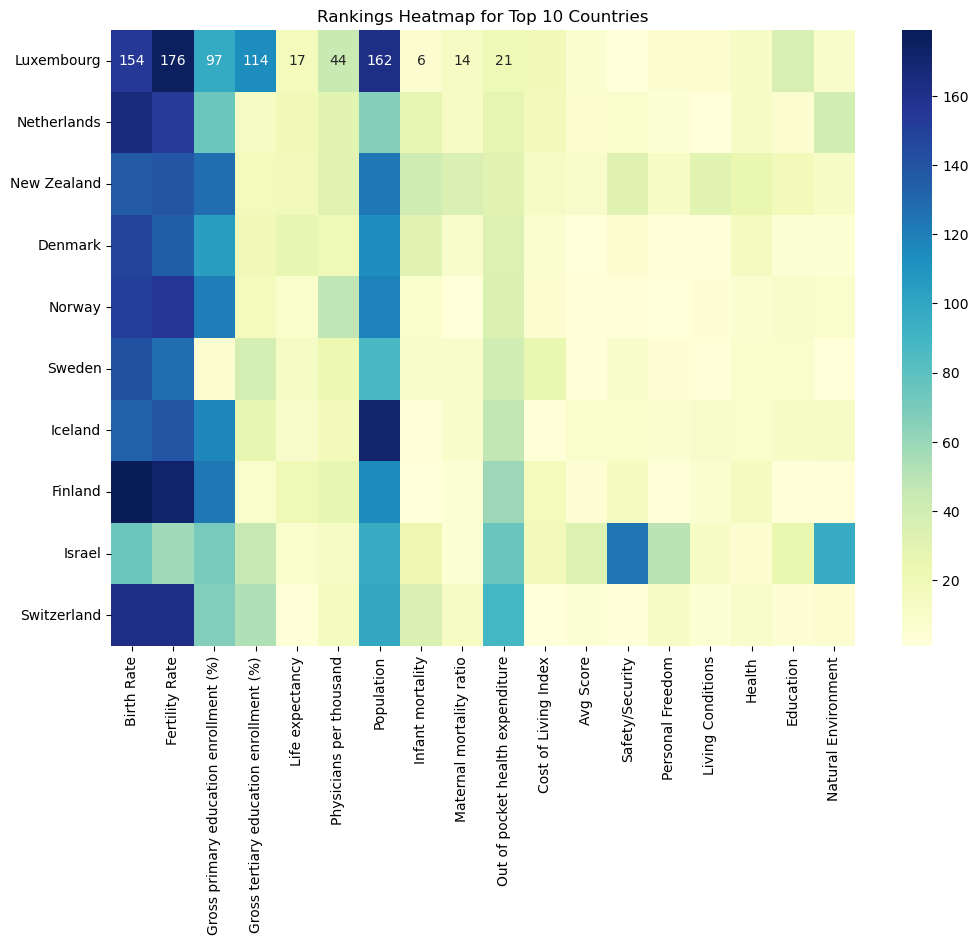

In [29]:
# Visualizations for top10_rankings
# Heatmap
import seaborn as sns


plt.figure(figsize=(12, 8))
sns.heatmap(top10_rankings, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Rankings Heatmap for Top 10 Countries")
plt.show()

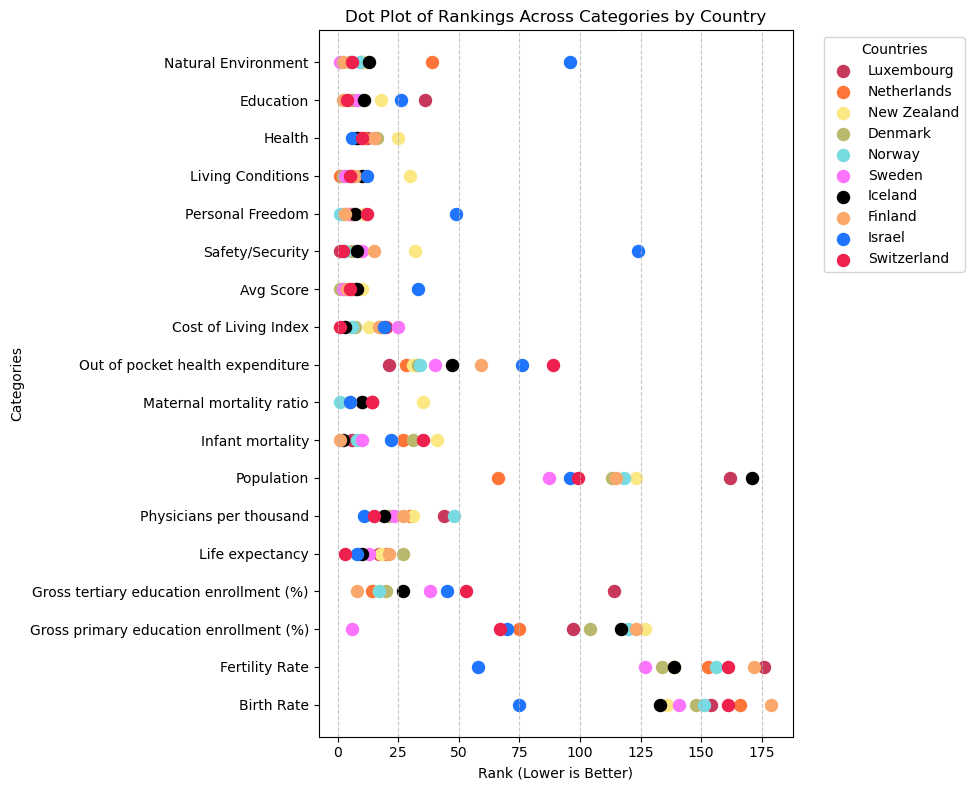

In [30]:
# Dot Plot Rankings Across Categories by Country

# Set up the plot
plt.figure(figsize=(10, 8))
crayon_list = ['Maroon', 'Orange', 'Yellow', 'Olive Green',
               'Aquamarine', 'Pink Flamingo', 'Black', 'Tan',
               'Blue', 'Red', 'Green']
# Create a color palette with a unique color for each country
colors = sns.crayon_palette(crayon_list)

# Create a dictionary mapping countries to colors
color_dict = dict(zip(top10_rankings.index, colors))

# Plot each country's data
for country in top10_rankings.index:
    plt.scatter(top10_rankings.loc[country],
                range(len(top10_rankings.columns)),
                label=country,
                color=color_dict[country],
                s=75)  # s is the size of the dots

# Customize the plot
plt.yticks(range(len(top10_rankings.columns)), top10_rankings.columns)
plt.xlabel('Rank (Lower is Better)')
plt.ylabel('Categories')
plt.title('Dot Plot of Rankings Across Categories by Country')

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Countries')

# Invert x-axis so that better ranks (lower numbers) are on the left
#plt.gca().invert_xaxis()

# Adjust layout to prevent cutting off the legend
plt.tight_layout()
# Save the plot
plt.savefig('Dot Plot Rankings.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

In [31]:
# Compare rankings from Happiness (Health) with Prosperity (Health)


def get_rankings(df, column, countries, ascending=False):
    # Rank the specified column
    df['Rank'] = df[column].rank(method='min', ascending=ascending)

    # Create a series with country as index and rank as value
    rankings = df.set_index('Country')['Rank']

    # Filter for the specified countries and convert to int
    return rankings[countries].astype(int)

# Get rankings for 'Healthy Life Expectancy' from happy_cleaned
healthy_life_rankings = get_rankings(happy_cleaned, 'Healthy Life Expectancy', top10_countries)

# Get rankings for 'Health' from prosperity
health_rankings = get_rankings(prosperity, 'Health', top10_countries)

# Create the new dataframe with country names as the index
health_comparison_df = pd.DataFrame({
    'Healthy Life Expectancy Rank': healthy_life_rankings,
    'Health Rank': health_rankings
})

# Ensure the index is named 'Country'
health_comparison_df.index.name = 'Country'

display(health_comparison_df)

,Healthy Life Expectancy Rank,Health Rank
Country,,
Finland,22,15
Denmark,20,16
Iceland,11,8
Israel,7,6
Netherlands,15,11
Sweden,10,9
Norway,16,7
Switzerland,5,10
Luxembourg,13,12


In [32]:
# Compare top10 countries Overall Happy rank vs Overall Prosperity Rank
def get_rankings(df, column, countries, ascending=False):
    # Rank the specified column
    df['Rank'] = df[column].rank(method='min', ascending=ascending)

    # Create a series with country as index and rank as value
    rankings = df.set_index('Country')['Rank']

    # Filter for the specified countries and convert to int
    return rankings[countries].astype(int)

# Get rankings for 'Ladder Score' from happy_cleaned
ladder_score_rankings = get_rankings(happy_cleaned, 'Ladder Score', top10_countries, ascending=False)

# Get rankings for 'Avg Score' from prosperity
avg_score_rankings = get_rankings(prosperity, 'Avg Score', top10_countries, ascending=False)

# Create the new dataframe with country names as the index
score_comparison_df = pd.DataFrame({
    'Overall Happiness Rank': ladder_score_rankings,
    'Overall Prosperity Rank': avg_score_rankings
})

# Ensure the index is named 'Country'
score_comparison_df.index.name = 'Country'

# Display the dataframe
display(score_comparison_df)

,Overall Happiness Rank,Overall Prosperity Rank
Country,,
Finland,1,4
Denmark,2,1
Iceland,3,8
Israel,4,33
Netherlands,5,6
Sweden,6,2
Norway,7,3
Switzerland,8,5
Luxembourg,9,7


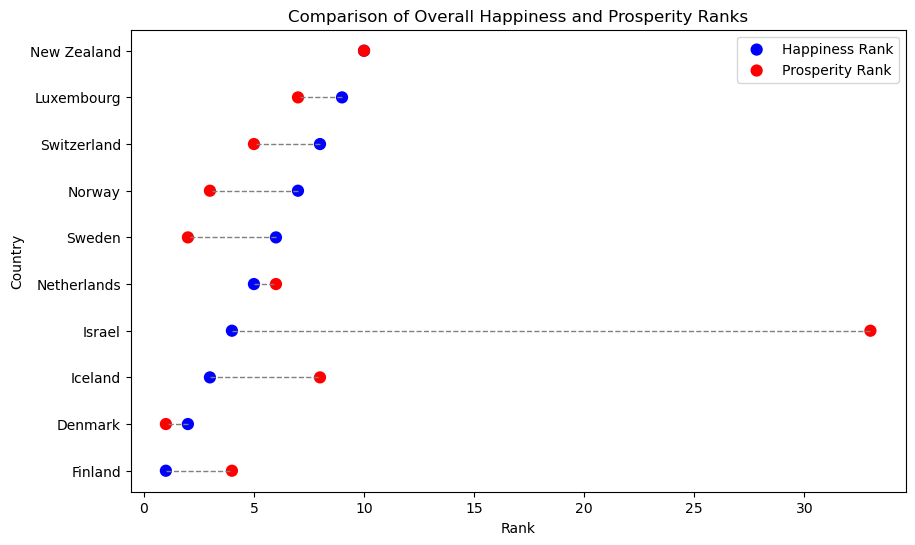

In [33]:
# Visualize Comparison between rank changes for top10

score_comparison_df = pd.DataFrame({
    'Country': ['Finland', 'Denmark', 'Iceland', 'Israel', 'Netherlands',
                'Sweden', 'Norway', 'Switzerland', 'Luxembourg', 'New Zealand'],
    'Overall Happiness Rank': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Overall Prosperity Rank': [4, 1, 8, 33, 6, 2, 3, 5, 7, 10]
})
score_comparison_df.set_index('Country', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the points for Overall Happiness Rank
sns.pointplot(x=score_comparison_df['Overall Happiness Rank'], y=score_comparison_df.index,
              color='blue', label='Happiness Rank', markers='o', linestyles='')

# Plotting the points for Overall Prosperity Rank
sns.pointplot(x=score_comparison_df['Overall Prosperity Rank'], y=score_comparison_df.index,
              color='red', label='Prosperity Rank', markers='o', linestyles='')

# Connecting lines
for country in score_comparison_df.index:
    plt.plot([score_comparison_df.loc[country, 'Overall Happiness Rank'],
              score_comparison_df.loc[country, 'Overall Prosperity Rank']],
             [country, country], color='gray', linestyle='--', linewidth=1)

plt.xlabel('Rank')
plt.title('Comparison of Overall Happiness and Prosperity Ranks')
plt.legend()
plt.gca().invert_yaxis()
# Save the plot
plt.savefig('top10 comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
# Ranked Difference comparison for all countries Happy vs Prosperity

# Create rankings for happy_cleaned
happy_cleaned['Happiness_Rank'] = happy_cleaned['Ladder Score'].rank(method='dense', ascending=False)

# Create rankings for prosperity
prosperity['Prosperity_Rank'] = prosperity['Avg Score'].rank(method='dense', ascending=False)

# Get the list of countries present in both dataframes
common_countries = list(set(happy_cleaned['Country']) & set(prosperity['Country']))

# Create the all_countries_ranked dataframe
all_countries_ranked = pd.DataFrame(index=common_countries)

# Add rankings from happy_cleaned
all_countries_ranked['Happiness_Rank'] = happy_cleaned.set_index('Country').loc[common_countries, 'Happiness_Rank']

# Add rankings from prosperity
all_countries_ranked['Prosperity_Rank'] = prosperity.set_index('Country').loc[common_countries, 'Prosperity_Rank']

# Calculate the difference in rankings
all_countries_ranked['Rank_Difference'] = all_countries_ranked['Happiness_Rank'] - all_countries_ranked['Prosperity_Rank']

# Sort the dataframe by Happiness_Rank
all_countries_ranked = all_countries_ranked.sort_values('Happiness_Rank')

# Display the first few rows of the dataframe
display(all_countries_ranked.head())

,Happiness_Rank,Prosperity_Rank,Rank_Difference
Finland,1.0,4.0,-3.0
Denmark,2.0,1.0,1.0
Iceland,3.0,8.0,-5.0
Israel,4.0,33.0,-29.0
Netherlands,5.0,6.0,-1.0


In [35]:
# Rename columns
all_countries_ranked.rename(columns={'Happiness_Rank': 'Happiness Rank',
                                      'Prosperity_Rank': 'Prosperity Rank',
                                     'Rank_Difference' : 'Rank Difference'}, inplace=True)

# Display the first few rows of the dataframe
display(all_countries_ranked.head())

min_difference = all_countries_ranked['Rank Difference'].max()
max_difference = all_countries_ranked['Rank Difference'].min()

,Happiness Rank,Prosperity Rank,Rank Difference
Finland,1.0,4.0,-3.0
Denmark,2.0,1.0,1.0
Iceland,3.0,8.0,-5.0
Israel,4.0,33.0,-29.0
Netherlands,5.0,6.0,-1.0


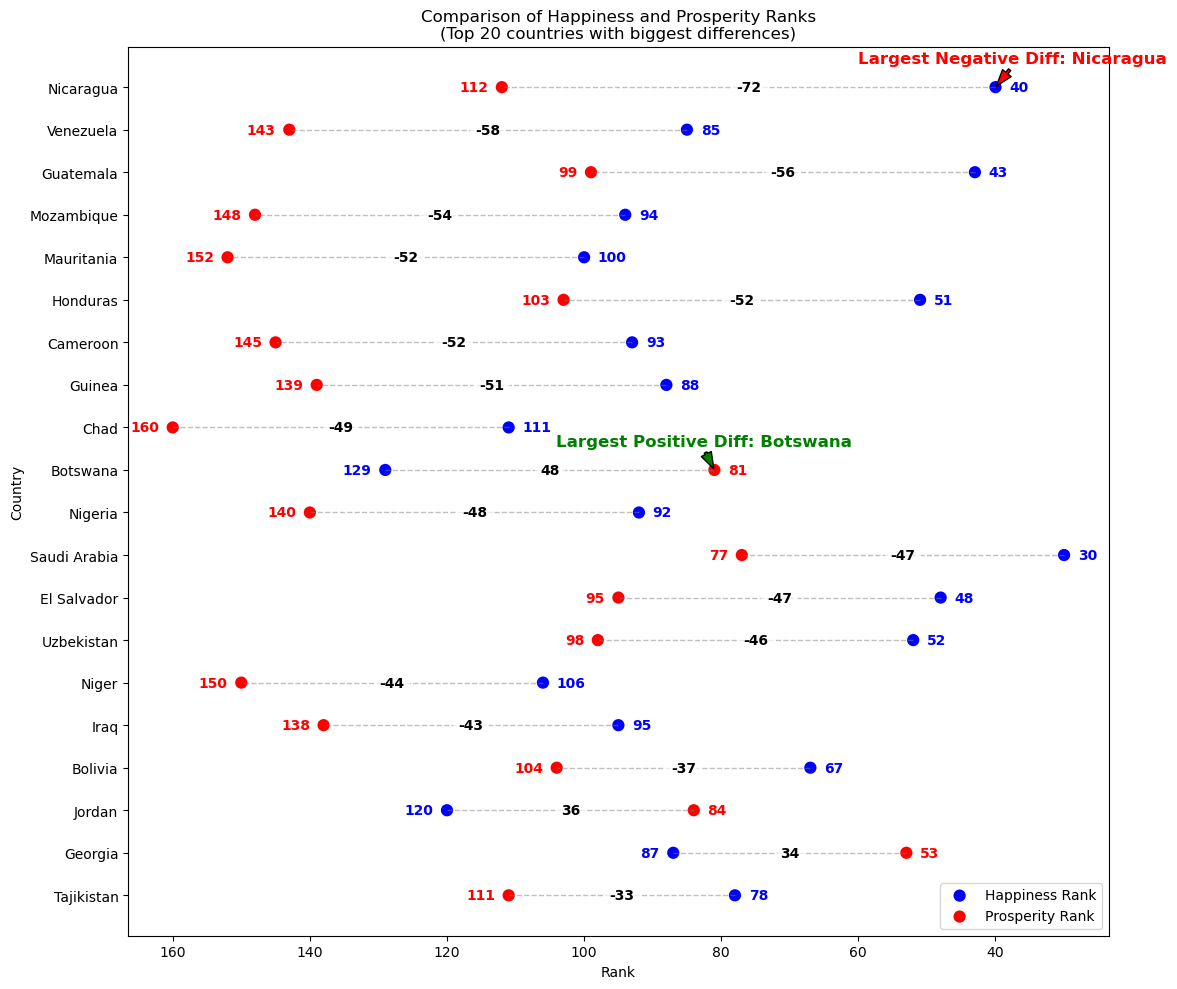

In [36]:
# Visualize Comparison between ranks

# Assuming all_countries_ranked_sorted is already sorted by absolute value of Rank Difference
all_countries_ranked_sorted = all_countries_ranked.sort_values('Rank Difference', key=abs, ascending=False)

# Select top 20 countries with the biggest rank differences
top_20_diff = all_countries_ranked_sorted.head(20)

# Plotting
plt.figure(figsize=(12, 10))  # Increased figure size to accommodate labels

# Plotting the points for Happiness Rank
sns.pointplot(x='Happiness Rank', y=top_20_diff.index,
              data=top_20_diff, color='blue', label='Happiness Rank',
              markers='o', linestyles='')

# Plotting the points for Prosperity Rank
sns.pointplot(x='Prosperity Rank', y=top_20_diff.index,
              data=top_20_diff, color='red', label='Prosperity Rank',
              markers='o', linestyles='')

# Connecting lines
for country in top_20_diff.index:
    plt.plot([top_20_diff.loc[country, 'Happiness Rank'],
              top_20_diff.loc[country, 'Prosperity Rank']],
             [country, country], color='gray', linestyle='--', linewidth=1, alpha=0.5)

# Adding rank labels for both Happiness and Prosperity
for i, country in enumerate(top_20_diff.index):
    happiness_rank = top_20_diff.loc[country, 'Happiness Rank']
    prosperity_rank = top_20_diff.loc[country, 'Prosperity Rank']
    diff = top_20_diff.loc[country, 'Rank Difference']

    # Label for Happiness Rank
    if happiness_rank <= prosperity_rank:
        plt.text(happiness_rank-2, i, f'{happiness_rank:.0f}', va='center', ha='left', color='blue', fontweight='bold')
        plt.text(prosperity_rank+2, i, f'{prosperity_rank:.0f}', va='center', ha='right', color='red', fontweight='bold')
    else:
        plt.text(happiness_rank+2, i, f'{happiness_rank:.0f}', va='center', ha='right', color='blue', fontweight='bold')
        plt.text(prosperity_rank-2, i, f'{prosperity_rank:.0f}', va='center', ha='left', color='red', fontweight='bold')

    # Label for Rank Difference
    midpoint = (happiness_rank + prosperity_rank) / 2
    plt.text(midpoint, i, f'{diff:.0f}', va='center', ha='center', color='black', fontweight='bold',
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# Find the countries with the maximum positive and negative differences
max_positive_diff = all_countries_ranked['Rank Difference'].max()
max_negative_diff = all_countries_ranked['Rank Difference'].min()

country_max_positive_diff = all_countries_ranked[all_countries_ranked['Rank Difference'] == max_positive_diff].index[0]
country_max_negative_diff = all_countries_ranked[all_countries_ranked['Rank Difference'] == max_negative_diff].index[0]

# Find the index of the country with the largest positive difference
max_positive_index = top_20_diff.index.get_loc(country_max_positive_diff)

# Find the index of the country with the largest negative difference
max_negative_index = top_20_diff.index.get_loc(country_max_negative_diff)

# Annotate the country with the largest positive rank difference
plt.annotate(f'Largest Positive Diff: {country_max_positive_diff}',
             xy=(all_countries_ranked.loc[country_max_positive_diff, 'Prosperity Rank'], max_positive_index),
             xytext=(all_countries_ranked.loc[country_max_positive_diff, 'Prosperity Rank'] - 20, max_positive_index - 0.5),
             arrowprops=dict(facecolor='green', shrink=0.05, width=2, headwidth=8),
             fontsize=12, color='green', fontweight='bold', ha='right', va='bottom')

# Annotate the country with the largest negative rank difference
plt.annotate(f'Largest Negative Diff: {country_max_negative_diff}',
             xy=(all_countries_ranked.loc[country_max_negative_diff, 'Happiness Rank'], max_negative_index),
             xytext=(all_countries_ranked.loc[country_max_negative_diff, 'Happiness Rank'] + 20, max_negative_index - 0.5),
             arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=8),
             fontsize=12, color='red', fontweight='bold', ha='left', va='bottom')

plt.xlabel('Rank')
plt.ylabel('Country')
plt.title('Comparison of Happiness and Prosperity Ranks\n(Top 20 countries with biggest differences)')
plt.legend(loc='lower right')
plt.gca().invert_xaxis()  # Invert x-axis so rank 1 is on the left
plt.tight_layout()
# Save the Plot
plt.savefig('rank_comparison_plot_top20.png', dpi=300, bbox_inches='tight')
plt.show()

In [37]:
# Compare rankings from Happiness (Health) with Prosperity (Health) for all countries

def get_rankings(df, column, ascending=False):
    # Rank the specified column, ignoring non-finite values
    df['Rank'] = df[column].rank(method='min', ascending=ascending)

    # Drop rows where the rank is NA
    df = df.dropna(subset=['Rank'])

    # Create a series with country as index and rank as value
    rankings = df.set_index('Country')['Rank']

    # Convert to int
    return rankings.astype(int)

# Get all countries from happy_cleaned
all_countries = happy_cleaned['Country'].tolist()

# Ensure the columns are numeric and handle non-finite values
happy_cleaned['Healthy Life Expectancy'] = pd.to_numeric(happy_cleaned['Healthy Life Expectancy'], errors='coerce')
prosperity['Health'] = pd.to_numeric(prosperity['Health'], errors='coerce')

# Get rankings for 'Healthy Life Expectancy' from happy_cleaned
healthy_life_rankings = get_rankings(happy_cleaned, 'Healthy Life Expectancy')

# Get rankings for 'Health' from prosperity
health_rankings = get_rankings(prosperity, 'Health')

# Filter health_rankings for countries present in happy_cleaned
health_rankings = health_rankings[health_rankings.index.isin(all_countries)]

# Create the new dataframe with country names as the index
health_comparison_df = pd.DataFrame({
    'Healthy Life Expectancy Rank': healthy_life_rankings,
    'Health Rank': health_rankings
})

# Ensure the index is named 'Country'
health_comparison_df.index.name = 'Country'

# Filter for countries present in both dataframes
common_countries = list(set(healthy_life_rankings.index) & set(health_rankings.index))
health_comparison_df = health_comparison_df.loc[common_countries]

# Sort by Healthy Life Expectancy Rank
health_comparison_df = health_comparison_df.sort_values('Healthy Life Expectancy Rank')

# Calculate the rank difference
health_comparison_df['Rank Difference'] = health_comparison_df['Healthy Life Expectancy Rank'] - health_comparison_df['Health Rank']

# Display the first few rows of the dataframe
display(health_comparison_df.head())

print(f"Total number of countries compared: {len(health_comparison_df)}")

,Healthy Life Expectancy Rank,Health Rank,Rank Difference
Country,,,
Japan,2,2.0,0.0
Singapore,3,1.0,2.0
South Korea,4,3.0,1.0
Switzerland,5,10.0,-5.0
Cyprus,6,29.0,-23.0


Total number of countries compared: 127


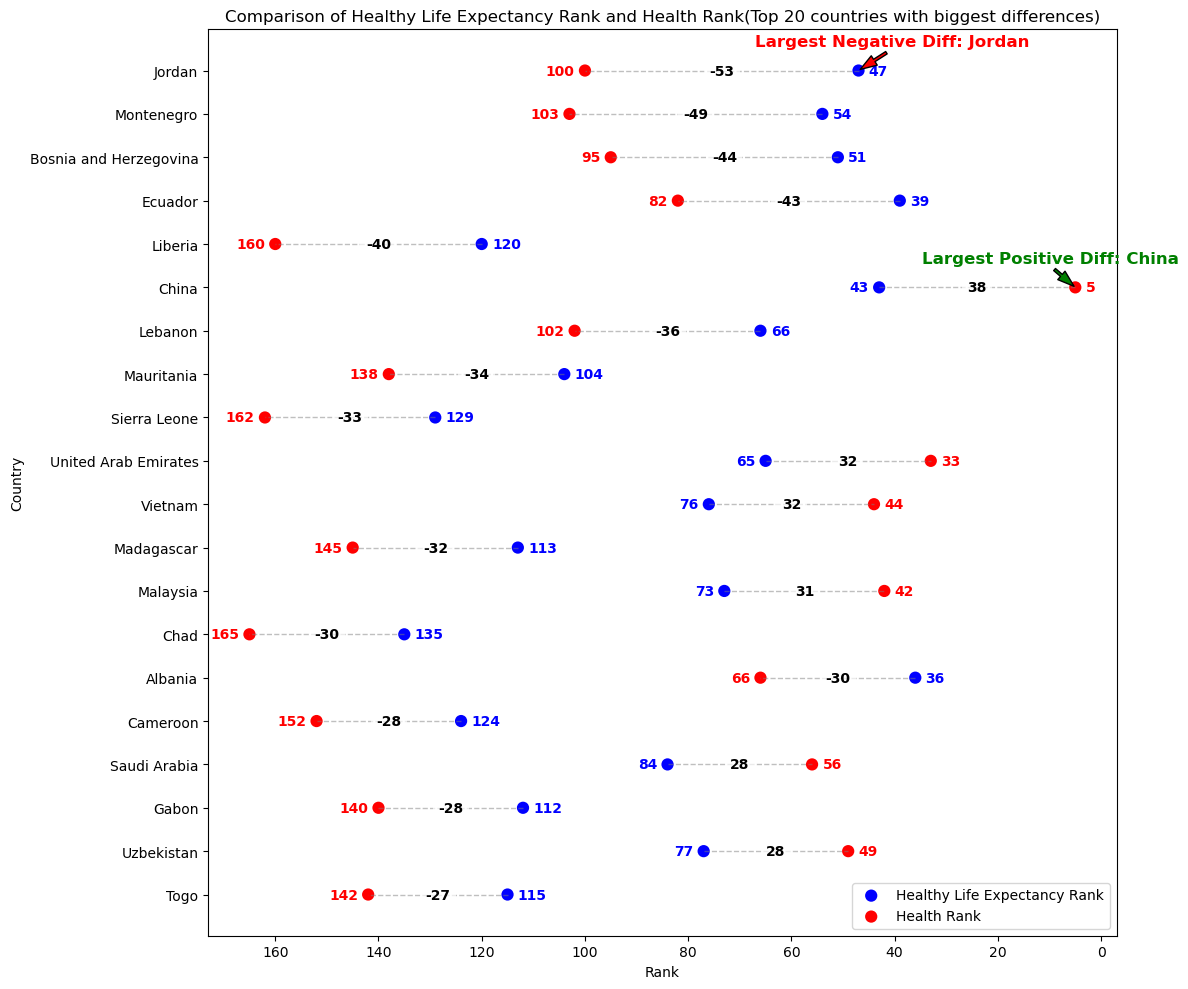

In [38]:
# Visualize Comparison between ranks

# Assuming health_comparison_df_sorted is already sorted by absolute value of Rank Difference
health_comparison_df_sorted = health_comparison_df.sort_values('Rank Difference', key=abs, ascending=False)

# Select top 20 countries with the biggest rank differences
top_20_diff = health_comparison_df_sorted.head(20)

# Plotting
plt.figure(figsize=(12, 10))  # Increased figure size to accommodate labels

# Plotting the points for Healthy Life Expectancy Rank
sns.pointplot(x='Healthy Life Expectancy Rank', y=top_20_diff.index,
              data=top_20_diff, color='blue', label='Healthy Life Expectancy Rank',
              markers='o', linestyles='')

# Plotting the points for Health Rank
sns.pointplot(x='Health Rank', y=top_20_diff.index,
              data=top_20_diff, color='red', label='Health Rank',
              markers='o', linestyles='')

# Connecting lines
for country in top_20_diff.index:
    plt.plot([top_20_diff.loc[country, 'Healthy Life Expectancy Rank'],
              top_20_diff.loc[country, 'Health Rank']],
             [country, country], color='gray', linestyle='--', linewidth=1, alpha=0.5)

# Adding rank labels for both Healthy Life Expectancy Rank and Health Rank
for i, country in enumerate(top_20_diff.index):
    life_ex_rank = top_20_diff.loc[country, 'Healthy Life Expectancy Rank']
    health_rank = top_20_diff.loc[country, 'Health Rank']
    diff = top_20_diff.loc[country, 'Rank Difference']

    # Label for Happy Life Expec
    if life_ex_rank <= health_rank:
        plt.text(life_ex_rank-2, i, f'{life_ex_rank:.0f}', va='center', ha='left', color='blue', fontweight='bold')
        plt.text(health_rank+2, i, f'{health_rank:.0f}', va='center', ha='right', color='red', fontweight='bold')
    else:
        plt.text(life_ex_rank+2, i, f'{life_ex_rank:.0f}', va='center', ha='right', color='blue', fontweight='bold')
        plt.text(health_rank-2, i, f'{health_rank:.0f}', va='center', ha='left', color='red', fontweight='bold')

    # Label for Rank Difference
    midpoint = (life_ex_rank + health_rank) / 2
    plt.text(midpoint, i, f'{diff:.0f}', va='center', ha='center', color='black', fontweight='bold',
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# Find the countries with the maximum positive and negative differences
max_positive_diff = health_comparison_df['Rank Difference'].max()
max_negative_diff = health_comparison_df['Rank Difference'].min()

country_max_positive_diff = health_comparison_df[health_comparison_df['Rank Difference'] == max_positive_diff].index[0]
country_max_negative_diff = health_comparison_df[health_comparison_df['Rank Difference'] == max_negative_diff].index[0]

# Find the index of the country with the largest positive difference
max_positive_index = top_20_diff.index.get_loc(country_max_positive_diff)

# Find the index of the country with the largest negative difference
max_negative_index = top_20_diff.index.get_loc(country_max_negative_diff)

# Annotate the country with the largest positive rank difference
plt.annotate(f'Largest Positive Diff: {country_max_positive_diff}',
             xy=(health_comparison_df.loc[country_max_positive_diff, 'Health Rank'], max_positive_index),
             xytext=(health_comparison_df.loc[country_max_positive_diff, 'Health Rank'] - 20, max_positive_index - 0.5),
             arrowprops=dict(facecolor='green', shrink=0.05, width=2, headwidth=8),
             fontsize=12, color='green', fontweight='bold', ha='right', va='bottom')

# Annotate the country with the largest negative rank difference
plt.annotate(f'Largest Negative Diff: {country_max_negative_diff}',
             xy=(health_comparison_df.loc[country_max_negative_diff, 'Healthy Life Expectancy Rank'], max_negative_index),
             xytext=(health_comparison_df.loc[country_max_negative_diff, 'Healthy Life Expectancy Rank'] + 20, max_negative_index - 0.5),
             arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=8),
             fontsize=12, color='red', fontweight='bold', ha='left', va='bottom')

plt.xlabel('Rank')
plt.ylabel('Country')
plt.title('Comparison of Healthy Life Expectancy Rank and Health Rank(Top 20 countries with biggest differences)')
plt.legend(loc='lower right')
plt.gca().invert_xaxis()  # Invert x-axis so rank 1 is on the left
plt.tight_layout()
# Save the Plot
plt.savefig('health_rank_comparison_plot.png', dpi=300, bbox_inches='tight')
plt.show()


In [39]:
def get_rankings(df, column, countries, ascending=False):
    # Rank the specified column
    df['Rank'] = df[column].rank(method='min', ascending=ascending)

    # Create a series with country as index and rank as value
    rankings = df.set_index('Country')['Rank']

    # Filter for the specified countries and convert to int
    # Use a dictionary comprehension to handle missing countries
    return pd.Series({country: int(rankings.get(country, 0)) for country in countries})

# Get rankings for 'Ladder Score' from happy_cleaned
ladder_score_rankings = get_rankings(happy_cleaned, 'Ladder Score', bottom10_countries, ascending=False)

# Get rankings for 'Avg Score' from prosperity
avg_score_rankings = get_rankings(prosperity, 'Avg Score', bottom10_countries, ascending=False)

# Create the new dataframe with country names as the index
score_comparison_df = pd.DataFrame({
    'Overall Happiness Rank': ladder_score_rankings,
    'Overall Prosperity Rank': avg_score_rankings
})

# Ensure the index is named 'Country'
score_comparison_df.index.name = 'Country'

# Remove rows where both ranks are 0 (indicating the country wasn't found in either dataset)
score_comparison_df = score_comparison_df[(score_comparison_df['Overall Happiness Rank'] != 0) | 
                                          (score_comparison_df['Overall Prosperity Rank'] != 0)]

# Display the dataframe
display(score_comparison_df)

,Overall Happiness Rank,Overall Prosperity Rank
Country,,
Afghanistan,137,164
Lebanon,136,112
Sierra Leone,135,144
Zimbabwe,134,139
Congo (Kinshasa),133,0
Botswana,132,83
Malawi,131,125
Comoros,130,128
Tanzania,129,117


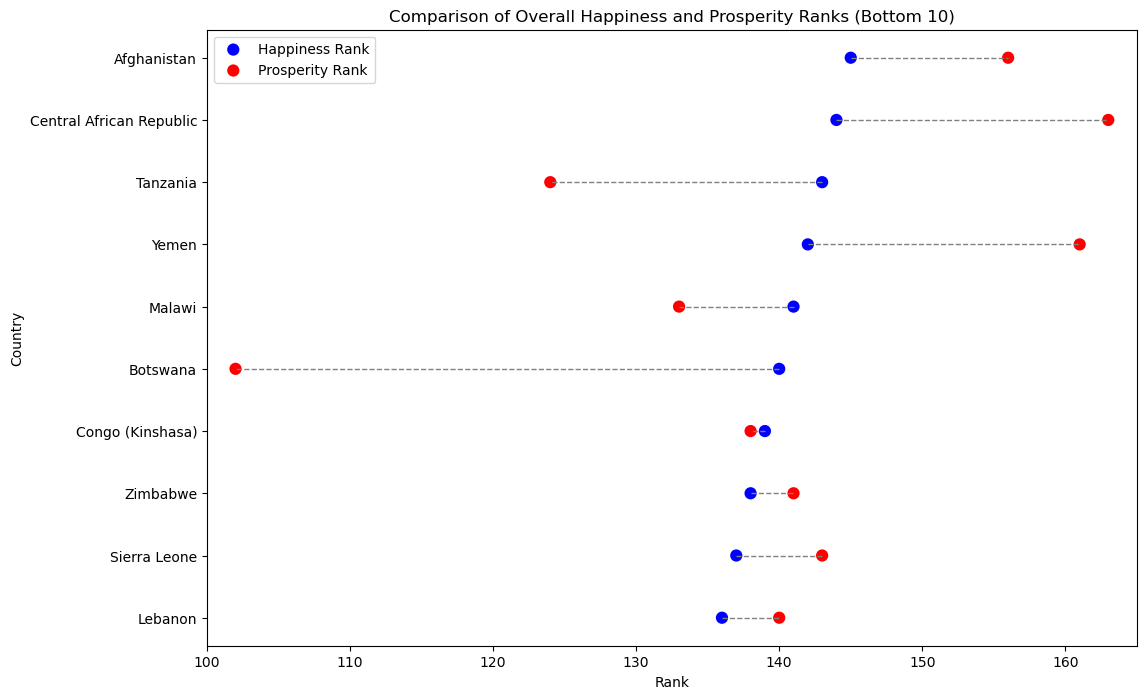

In [40]:
# Visualize Comparison between rank changes for bottom10

score_comparison_df = pd.DataFrame({
    'Country': ['Lebanon', 'Sierra Leone', 'Zimbabwe', 'Congo (Kinshasa)', 'Botswana',
                'Malawi', 'Yemen', 'Tanzania', 'Central African Republic', 'Afghanistan'],
    'Overall Happiness Rank': [136, 137, 138, 139, 140, 141, 142, 143, 144, 145],
    'Overall Prosperity Rank': [140, 143, 141, 138, 102, 133, 161, 124, 163, 156]
})
score_comparison_df.set_index('Country', inplace=True)

# Plotting
plt.figure(figsize=(12, 8))

# Plotting the points for Overall Happiness Rank
sns.pointplot(x=score_comparison_df['Overall Happiness Rank'], y=score_comparison_df.index,
              color='blue', label='Happiness Rank', markers='o', linestyles='')

# Plotting the points for Overall Prosperity Rank
sns.pointplot(x=score_comparison_df['Overall Prosperity Rank'], y=score_comparison_df.index,
              color='red', label='Prosperity Rank', markers='o', linestyles='')

# Connecting lines
for country in score_comparison_df.index:
    plt.plot([score_comparison_df.loc[country, 'Overall Happiness Rank'],
              score_comparison_df.loc[country, 'Overall Prosperity Rank']],
             [country, country], color='gray', linestyle='--', linewidth=1)

plt.xlabel('Rank')
plt.title('Comparison of Overall Happiness and Prosperity Ranks (Bottom 10)')
plt.legend()
plt.gca().invert_yaxis()

# Adjust x-axis to show all ranks
plt.xlim(100, 165)  # Adjust this range if needed to show all points

# Save the plot
plt.savefig('bottom10_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [41]:
top10_rankings.columns

Index(['Birth Rate', 'Fertility Rate',
       'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Life expectancy',
       'Physicians per thousand', 'Population', 'Infant mortality',
       'Maternal mortality ratio', 'Out of pocket health expenditure',
       'Cost of Living Index', 'Avg Score', 'Safety/Security',
       'Personal Freedom', 'Living Conditions', 'Health', 'Education',
       'Natural Environment'],
      dtype='object')

In [42]:
# Create New top10 rankings

# Create new10_rankings by dropping specified columns
columns_to_drop = ['Birth Rate', 'Fertility Rate', 'Gross primary education enrollment (%)', 
                   'Gross tertiary education enrollment (%)', 'Cost of Living Index', 'Avg Score']
new10_rankings = top10_rankings.drop(columns=columns_to_drop)


# Columns to add from happy_cleaned
columns_to_add = ['Logged GDP per capita', 'Social Support', 'Healthy Life Expectancy', 
                  'Freedom to make life choices', 'Generosity', 'Perceptions of Corruption']

new10_rankings.columns = new10_rankings.columns.str.title()

def rank_column(series, ascending=False):
    return series.rank(method='min', ascending=ascending)

# Add and rank new columns
for column in columns_to_add:
    if column in happy_cleaned.columns:
        if column == 'Perceptions of Corruption':
            rankings = rank_column(happy_cleaned[column], ascending=True)
        else:
            rankings = rank_column(happy_cleaned[column], ascending=False)
        
        # Create a Series with country as index and rankings as values
        rankings_series = pd.Series(rankings.values, index=happy_cleaned['Country'])
        
        # Filter rankings for top10 countries and convert to int
        new10_rankings[column] = rankings_series[top10_countries].astype(int)
    else:
        print(f"Warning: Column '{column}' not found in happy_cleaned DataFrame")

# Display the new rankings
display(new10_rankings)

# Print column names to verify
print("\nColumns in new10_rankings:")
print(new10_rankings.columns.tolist())

# Print data info
print("\nData info for new10_rankings:")
new10_rankings.info()

,Life Expectancy,Physicians Per Thousand,Population,Infant Mortality,Maternal Mortality Ratio,Out Of Pocket Health Expenditure,Safety/Security,Personal Freedom,Living Conditions,Health,Education,Natural Environment,Logged GDP per capita,Social Support,Healthy Life Expectancy,Freedom to make life choices,Generosity,Perceptions of Corruption
Luxembourg,17,44,162,6,14,21,1,6,6,12,36,10,1,48,13,16,58,8
Netherlands,20,30,66,27,14,28,9,5,1,11,6,39,10,19,15,27,12,10
New Zealand,18,31,123,41,35,31,32,11,30,25,18,11,25,6,28,27,20,6
Denmark,27,21,113,31,10,33,6,2,2,16,5,5,9,3,20,10,30,3
Norway,8,48,118,8,1,34,3,1,4,7,10,9,6,9,16,4,27,7
Sweden,13,23,87,10,10,40,10,4,3,9,8,1,13,12,10,3,22,4
Iceland,10,19,171,2,10,47,8,7,10,8,11,13,12,1,11,9,13,35
Finland,21,27,115,1,5,59,15,3,7,15,2,2,18,2,22,1,80,2
Israel,8,11,96,22,5,76,124,49,12,6,26,96,27,9,7,62,81,44
Switzerland,3,15,99,35,14,89,2,12,5,10,4,6,4,23,5,24,57,5



Columns in new10_rankings:
['Life Expectancy', 'Physicians Per Thousand', 'Population', 'Infant Mortality', 'Maternal Mortality Ratio', 'Out Of Pocket Health Expenditure', 'Safety/Security', 'Personal Freedom', 'Living Conditions', 'Health', 'Education', 'Natural Environment', 'Logged GDP per capita', 'Social Support', 'Healthy Life Expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of Corruption']

Data info for new10_rankings:
<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Luxembourg to Switzerland
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Life Expectancy                   10 non-null     int32
 1   Physicians Per Thousand           10 non-null     int32
 2   Population                        10 non-null     int32
 3   Infant Mortality                  10 non-null     int32
 4   Maternal Mortality Ratio          10 non-null     int32
 5

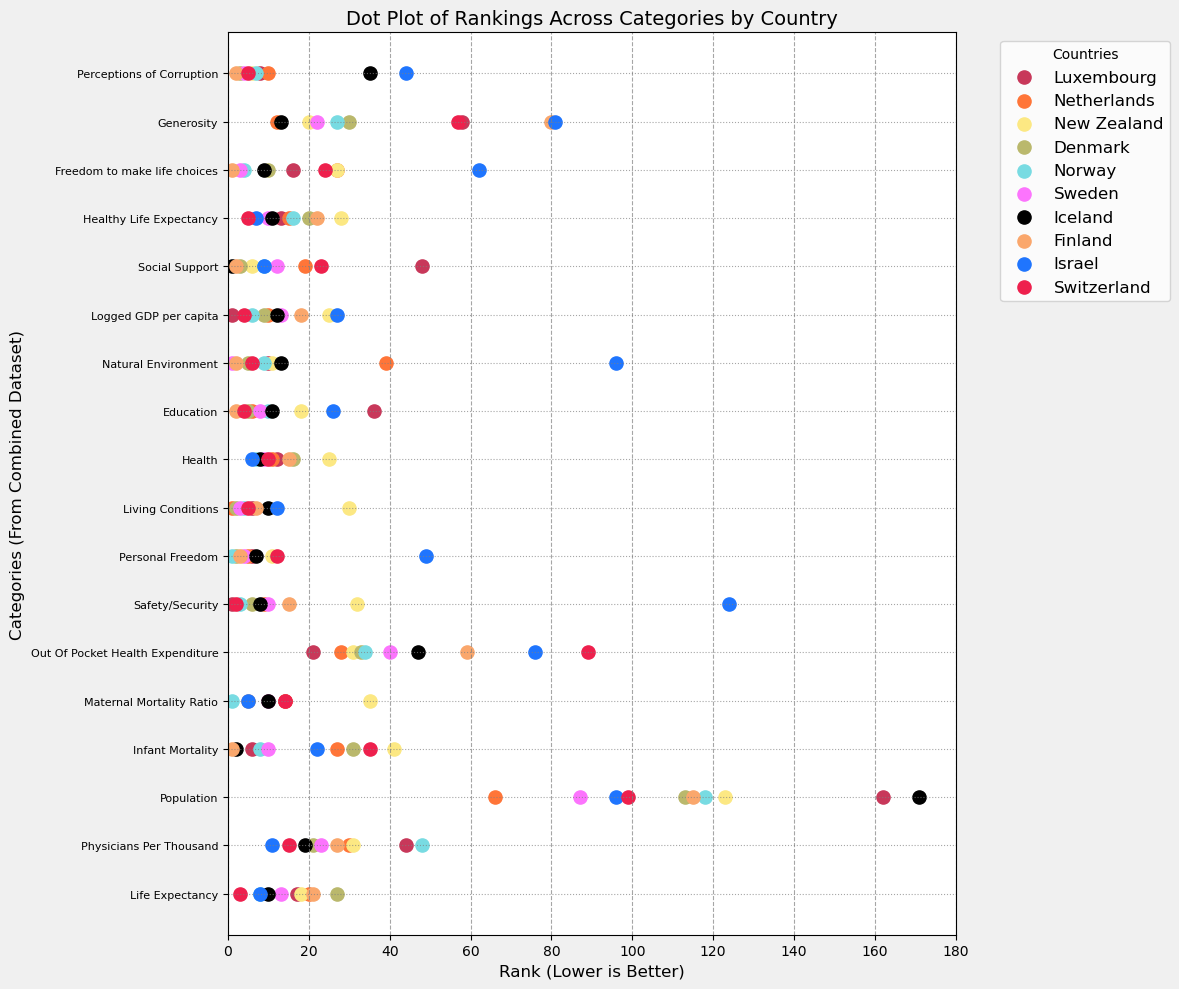

In [43]:
# Dot Plot Rankings Across Categories by Country for new10_rankings

# Set up the plot
plt.figure(figsize=(12, 10),facecolor='#F0F0F0')  # Increased figure size for better readability
crayon_list = ['Maroon', 'Orange', 'Yellow', 'Olive Green',
               'Aquamarine', 'Pink Flamingo', 'Black', 'Tan',
               'Blue', 'Red']  # Removed one color as we have 10 countries

# Create a color palette with a unique color for each country
colors = sns.crayon_palette(crayon_list)

# Create a dictionary mapping countries to colors
color_dict = dict(zip(new10_rankings.index, colors))

# Plot each country's data
for country in new10_rankings.index:
    plt.scatter(new10_rankings.loc[country],
                range(len(new10_rankings.columns)),
                label=country,
                color=color_dict[country],
                s=90)  # s is the size of the dots

# Customize the plot
plt.yticks(range(len(new10_rankings.columns)), new10_rankings.columns, fontsize=8)
plt.xlabel('Rank (Lower is Better)', fontsize=12)
plt.ylabel('Categories (From Combined Dataset)', fontsize=12)
plt.title('Dot Plot of Rankings Across Categories by Country', fontsize=14)


# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7, color='gray')
plt.grid(axis='y', linestyle=':', alpha=0.7, color='gray')
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Countries', fontsize=12)

# Invert x-axis so that better ranks (lower numbers) are on the left
plt.gca().invert_xaxis()

# Set x-axis limit to show ranks up to 200 (adjust if needed)
plt.xlim(0, 180)

# Adjust layout to prevent cutting off the legend
plt.tight_layout()

# Save the plot
plt.savefig('New10_Rankings_Dot_Plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [48]:
# Sort the dataframe by 'Physicians per thousand' in descending order
# and get the top 30 countries
top_30_physicians = info_ranked.sort_values('Physicians per thousand', ascending=True).head(30)

# Sort by 'Infant mortality' and 'Maternal mortality ratio' in ascending order
# and get the top 30 for each
top_30_infant_mortality = info_ranked.sort_values('Infant mortality', ascending=True).head(30)
top_30_maternal_mortality = info_ranked.sort_values('Maternal mortality ratio', ascending=True).head(30)

# Create a set of countries that are in the top 30 for all three metrics
# We use the index (which is 'Country') instead of a 'Country' column
countries_in_all_top_30 = set(top_30_physicians.index) & \
                          set(top_30_infant_mortality.index) & \
                          set(top_30_maternal_mortality.index)

# Convert the set to a list
countries_in_all_top_30_list = list(countries_in_all_top_30)

print("Countries in top 30 for all three metrics:")
print(countries_in_all_top_30_list)
print(f"Number of countries: {len(countries_in_all_top_30_list)}")

Countries in top 30 for all three metrics:
['Israel', 'Czech Republic', 'Finland', 'Netherlands', 'Austria', 'Spain', 'Sweden', 'Iceland', 'Lithuania', 'Australia', 'Belarus', 'Italy', 'Germany']
Number of countries: 13


In [47]:
# Create lists of top 30 countries for each metric
top_30_physicians = info_ranked.sort_values('Physicians per thousand', ascending=True).head(30).index.tolist()
top_30_infant_mortality = info_ranked.sort_values('Infant mortality', ascending=True).head(30).index.tolist()
top_30_maternal_mortality = info_ranked.sort_values('Maternal mortality ratio', ascending=True).head(30).index.tolist()

print("Top 30 countries for Physicians per thousand:")
print(top_30_physicians)
print("\nTop 30 countries for Infant mortality (lowest):")
print(top_30_infant_mortality)
print("\nTop 30 countries for Maternal mortality ratio (lowest):")
print(top_30_maternal_mortality)

Top 30 countries for Physicians per thousand:
['Cuba', 'Georgia', 'Monaco', 'Lithuania', 'San Marino', 'Greece', 'Belarus', 'Austria', 'Portugal', 'Uruguay', 'Israel', 'Maldives', 'Estonia', 'Armenia', 'Switzerland', 'Germany', 'Trinidad and Tobago', 'Czech Republic', 'Iceland', 'Bulgaria', 'Denmark', 'Russia', 'Italy', 'Sweden', 'Argentina', 'Spain', 'Finland', 'Australia', 'North Korea', 'Netherlands']

Top 30 countries for Infant mortality (lowest):
['Finland', 'Iceland', 'Slovenia', 'San Marino', 'Japan', 'Cyprus', 'Luxembourg', 'Norway', 'Estonia', 'Sweden', 'Montenegro', 'Singapore', 'Spain', 'Belarus', 'Italy', 'Monaco', 'South Korea', 'Andorra', 'Czech Republic', 'Austria', 'Belgium', 'Israel', 'Portugal', 'Australia', 'Germany', 'Republic of Ireland', 'Netherlands', 'Latvia', 'Lithuania', 'France']

Top 30 countries for Maternal mortality ratio (lowest):
['Norway', 'Belarus', 'Poland', 'Italy', 'United Arab Emirates', 'Finland', 'Greece', 'Czech Republic', 'Israel', 'Sweden', 

In [50]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Get the data for the countries in all top 30 lists
# countries = ['Israel', 'Czech Republic', 'Finland', 'Netherlands', 'Austria', 'Spain', 'Sweden', 'Iceland', 'Lithuania', 'Australia', 'Belarus', 'Italy', 'Germany']
# data = info_ranked.loc[countries, ['Physicians per thousand', 'Infant mortality', 'Maternal mortality ratio']]

# # Melt the dataframe to long format for easier plotting
# data_melted = data.reset_index().melt(id_vars='Country', var_name='Metric', value_name='Value')

# # Create the plot
# plt.figure(figsize=(15, 10))
# sns.barplot(x='Country', y='Value', hue='Metric', data=data_melted)
# plt.xticks(rotation=45, ha='right')
# plt.title('Comparison of Health Metrics for Top Performing Countries')
# plt.tight_layout()
# plt.show()